## Transfomada Z y respuesta en frecuencia

El presente informe muestra una exploraci{on de las primeras nociones en la transformada Z y su respuesta en frecuencia. Se utiliza dicha herramienta para obtener repuestas de modulo y fase de filtros de media movil descriptos a partir de esus cuaciones en diferencias

Dada una señal discreta x(n), su transformada se define como:
$ X(z) = \sum_{n=-\infty}^{\infty} x(n)\, z^{-n} $ donde z es un número complejo $ (e^{jw}) $. La transformada Z es una herramienta matematica que permite el análisis de sistemas discetos, para encontrar funciones de transferencia y analizar estabilidad y comportamiento en frecuenciav (esto se debe a que al evaluar la transformada Z en la circunferencia unitaria, se obtiene la respuesta en frecuencia del sistema.


Dado las siguientes ecuaciones en diferencias de los siguientes sistemas, que representan un filtro de media móvil: 

**a)**
$y(n) = x(n - 3) + x(n - 2) + x(n - 1) + x(n)$

**b)**  
$y(n) = x(n - 4) + x(n - 3) + x(n - 2) + x(n - 1) + x(n)$

**c)**  
$y(n) = x(n) - x(n - 1)$

**d)**  
$y(n) = x(n) - x(n - 2)$

Se pide

 1) Función de transferencia $T(z) = \dfrac{Y(z)}{X(z)}$
 2) Calcular la respuesta en frecuencia de módulo y fase.
 3) Simular y validar la respuesta en frecuencia de todos los sistemas con NumPy.

Para cada sistema, se aplica la transformada $Z$ y se obtiene la función de transferencia:





**a)**

$ y(n) = x(n - 3) + x(n - 2) + x(n - 1) + x(n)
$

Transformada Z:

Aplicamos la transformada Z a ambos lados:

$ Y(z) = X(z)z^{-3} + X(z)z^{-2} + X(z)z^{-1} + X(z) $

Factor común:

$ Y(z) = X(z)(z^{-3} + z^{-2} + z^{-1} + 1) $

Función de transferencia:
$ T(z) = \frac{Y(z)}{X(z)} = z^{-3} + z^{-2} + z^{-1} + 1 $ 

Multiplicamos numerador y denominador por $z^3$:

$ T(z) = \frac{1 + z + z^2 + z^3}{z^3} $

La respuesta en frecuencia resulta de evaluar la función de transferencia en la circunferencia unitaria del plano Z (|z|=1), esto da la respuesta del sistema a señales senoidales de distintas frecuencias.

Esto es: 
$ T(e^{j\omega}) = T(z)\big|_{z = e^{j\omega}} $


Reemplazamos $( z = e^{j\omega})$ :

$T(e^{j\omega}) = \frac{1 + e^{j\omega} + e^{j2\omega} + e^{j3\omega}}{e^{j3\omega}}$

Factorizamos $ e^{j\frac{3}{2}\omega} $:

$ T(e^{j\omega}) = e^{-j\frac{3}{2}\omega} ( e^{j\frac{3}{2}\omega} + e^{j\frac{1}{2}\omega} + e^{-j\frac{1}{2}\omega} + e^{-j\frac{3}{2}\omega}) $


Agrupamos en suma de cosenos:


$ T(e^{j\omega}) = e^{-j\frac{3}{2}\omega}( 2\cos(\frac{\omega}{2}) + 2\cos(\frac{3\omega}{2}) ) $

Entonces el módulo de la respuesta resulta ser:

$ | T(e^{j\omega}) | = | 2\cos(\frac{\omega}{2}) + 2\cos(\frac{3\omega}{2})|$

Y su fase es simplemente:

$ \angle T(e^{j\omega}) = -\frac{3}{2}\omega $



## Implementacion en Python: ##
Para la implementación del análisis en frecuencia, se utilizó la función sig.freqz del módulo scipy.signal, que permite calcular la respuesta en frecuencia de un filtro digital a partir de su función de transferencia. Dado un numerador de orden 𝑀 y un denominador de orden 
𝑁 es decir, los vectores de coeficientes de la función de transferencia del sistema:
$ H(e^{jw})=\frac{A(e^{jw})}{B(e^{jw})}=\frac{b_0 + b_1e^{-jw} + ... + b_Me^{-jwM}}{(a_0 + a_1e^{-jw} + ... + a_Ne^{-jwN}} $
la función freqz retorna:
w:  array de frecuencias angulares en radianes/muestra en las que se evalúa la respuesta del sistema. Por defecto, el rango de w es de 0 a π (frecuencia de Nyquist), es decir, está normalizado.
h: respuesta en frecuencia $ H(e^{jw})$ expresada en numeros complejos.
Los valores permiten analizar el comportamiento del filtro en el dominio de la frecuencia por medio del uso de np.abs(h), que devuelve el módulo de h y np.angle(h), que permite obtener la fase.






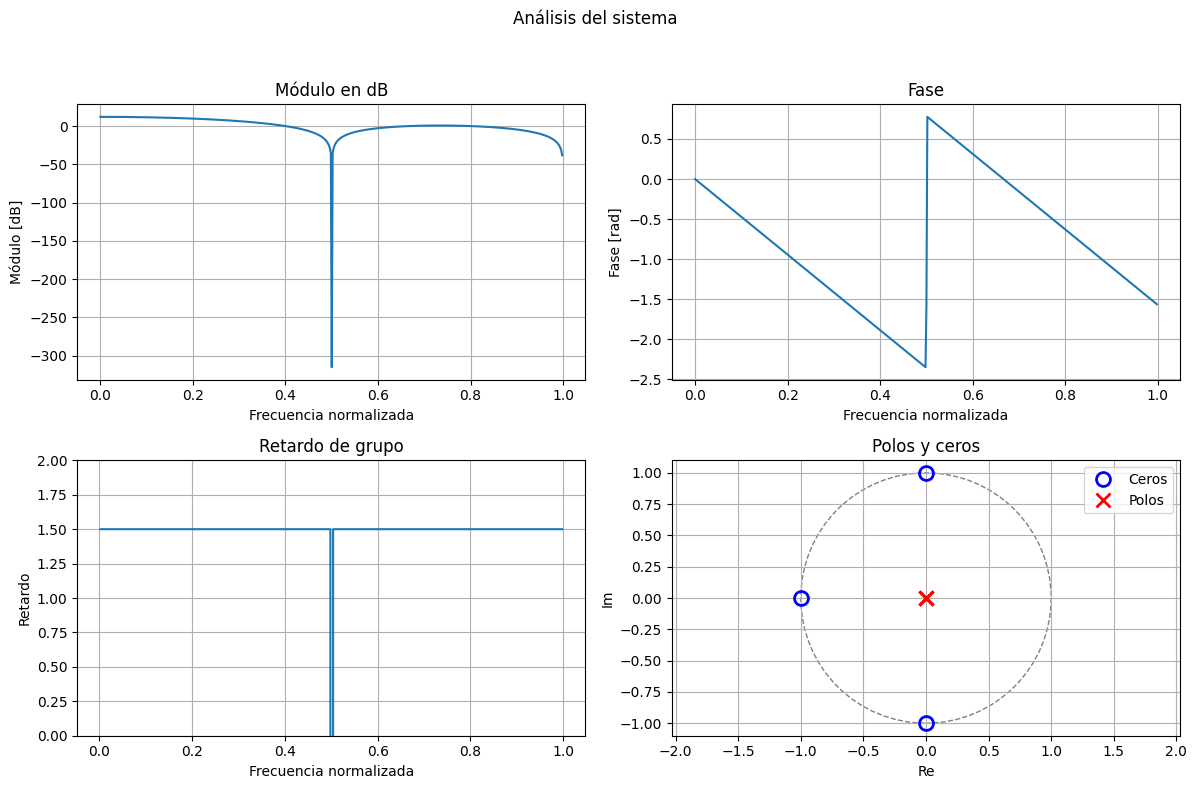

In [44]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 30 12:43:20 2025
@author: iremo
"""

import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

tznum = [1, 1, 1, 1]  # 1 + z^{-1} + z^{-2} + z^{-3}
tzden = [1, 0, 0, 0]

w, h = sig.freqz(tznum, tzden)
freqN = w / np.pi
retardoGrupo = -np.diff(np.unwrap(np.angle(h))) / np.diff(w)

# Polos y ceros
tfz = sig.TransferFunction(tznum, tzden, dt=1)  # Sistema discreto

# Figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Análisis del sistema')

# Módulo
axs[0, 0].plot(freqN, 20 * np.log10(np.abs(h)))
axs[0, 0].set_title('Módulo en dB')
axs[0, 0].set_xlabel('Frecuencia normalizada')
axs[0, 0].set_ylabel('Módulo [dB]')
axs[0, 0].grid()

# Fase
axs[0, 1].plot(freqN, np.angle(h))
axs[0, 1].set_title('Fase')
axs[0, 1].set_xlabel('Frecuencia normalizada')
axs[0, 1].set_ylabel('Fase [rad]')
axs[0, 1].grid()

# Retardo de grupo
axs[1, 0].plot(freqN[1:], retardoGrupo)
axs[1, 0].set_title('Retardo de grupo')
axs[1, 0].set_xlabel('Frecuencia normalizada')
axs[1, 0].set_ylabel('Retardo')
axs[1, 0].grid()
max_delay_samples = np.ceil(np.max(retardoGrupo))
axs[1, 0].set_ylim(0, max_delay_samples)

# Diagrama de polos y ceros
axs[1, 1].plot(np.real(tfz.zeros), np.imag(tfz.zeros), 'o', color='blue',
              markersize=10, fillstyle='none', markeredgewidth=2, label='Ceros')
axs[1, 1].plot(np.real(tfz.poles), np.imag(tfz.poles), 'x', color='red',
              markersize=10, markeredgewidth=2, label='Polos')
circle = plt.Circle((0, 0), 1, color='gray', linestyle='--', fill=False)
axs[1, 1].add_patch(circle)
axs[1, 1].axis('equal')
axs[1, 1].set_title('Polos y ceros')
axs[1, 1].set_xlabel('Re')
axs[1, 1].set_ylabel('Im')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Interpretación:

La resolución de la ecuación en diferencias y su validación utilizando SciPY permitió analizar los gráficos de magnitud, fase, retardo y el diagrama de polos y ceros que caracteriza a la función de transferencia del sistema. 

A partir de la resolución y las figuras obtenidas, se concluye que el filtro es de tipo pasa bajas, con una respuesta caracterizada por M-1 ceros equiespaciados (en este caso, con M=4, se obtienen 3 ceros equiespaciados) en en el círculo unitario. Y su polo de tercer orden en el origen, lo cual indica que es un sistema estable (esperable para un filtro FIR). 
Como podemos ver, este filtro posee una fase lineal, lo cual es característico para el caso de un FIR simétrico respecto de su punto medio. Además, la simetría implica que la fase es lineal, lo cual corresponde con el gráfico de fase obtenido, no introduce distorsión de fase. 
En cuanto a su respuesta de módulo, se observa que pasa bajas frecuencias (valor alto para w = 0) y atenúa frecuencias altas (mucha atenuación en w = pi). Esta respuesta confirma que se trata de un pasa bajas FIR.
En conclusión, la ecuación en diferencias expresada en el punto a representa un filtro FIR simétrico de orden 3, también conocido como un filtro de media móvil no normalizada. A nivel práctico, este filtro puede utilizarse para suavizar señales. Realiza un promedio ponderado de los últimos 4 valores de la señal. Esto produce transiciones menos bruscas, atenúa el ruido en altas frecuencias, y puede preservar señales lentas o de frecuencia baja.
Para mejorar este filtro, podría realizarse una normalización, es decir, dividir por 4, para obtener un promedio móvil real, asimismo, extenderlo a un mayor número de muestras produciría una mejor atenuación del ruido, por último, podría diseñarse uno con ventana para controlar mejor le lóbulo principal y los secundarios.



**b)**

Ecuación en diferencias:

$y(n) = x(n - 4) + x(n - 3) + x(n - 2) + x(n - 1) + x(n)$


$T(z) = \frac{1 + z + z^2 + z^3 + z^4}{z^4}$

Una vez obtenida la función de transferencia, evaluamos z para obtener la respuesta en frecuencia.


Respuesta en frecuencia:


Módulo:

$| T(e^{j\omega})| =| 2\cos(\omega) + 2\cos(2\omega) + 1 |$


Fase:

$\angle T(e^{j\omega}) = -2\omega $



### Validación en Python:

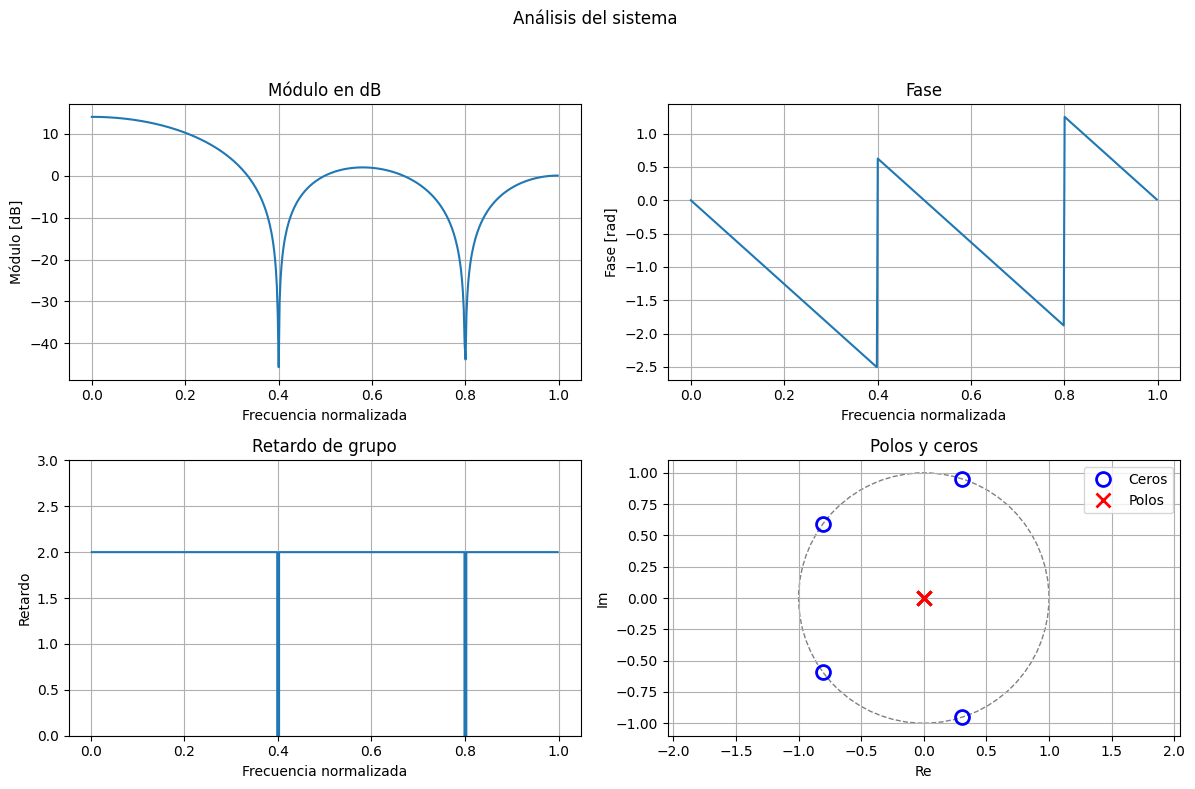

In [28]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 30 12:43:20 2025
@author: iremo
"""

import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

tznum = [1, 1, 1, 1, 1]  # 1 + z^{-1} + z^{-2} + z^{-3}
tzden = [1, 0, 0, 0, 0]

w, h = sig.freqz(tznum, tzden)
freqN = w / np.pi
retardoGrupo = -np.diff(np.unwrap(np.angle(h))) / np.diff(w)

# Polos y ceros
tfz = sig.TransferFunction(tznum, tzden, dt=1)  # Sistema discreto

# Figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Análisis del sistema')

# Módulo
axs[0, 0].plot(freqN, 20 * np.log10(np.abs(h)))
axs[0, 0].set_title('Módulo en dB')
axs[0, 0].set_xlabel('Frecuencia normalizada')
axs[0, 0].set_ylabel('Módulo [dB]')
axs[0, 0].grid()

# Fase
axs[0, 1].plot(freqN, np.angle(h))
axs[0, 1].set_title('Fase')
axs[0, 1].set_xlabel('Frecuencia normalizada')
axs[0, 1].set_ylabel('Fase [rad]')
axs[0, 1].grid()

# Retardo de grupo
axs[1, 0].plot(freqN[1:], retardoGrupo)
axs[1, 0].set_title('Retardo de grupo')
axs[1, 0].set_xlabel('Frecuencia normalizada')
axs[1, 0].set_ylabel('Retardo')
axs[1, 0].grid()
max_delay_samples = np.ceil(np.max(retardoGrupo))
axs[1, 0].set_ylim(0, max_delay_samples)

# Diagrama de polos y ceros
axs[1, 1].plot(np.real(tfz.zeros), np.imag(tfz.zeros), 'o', color='blue',
              markersize=10, fillstyle='none', markeredgewidth=2, label='Ceros')
axs[1, 1].plot(np.real(tfz.poles), np.imag(tfz.poles), 'x', color='red',
              markersize=10, markeredgewidth=2, label='Polos')
circle = plt.Circle((0, 0), 1, color='gray', linestyle='--', fill=False)
axs[1, 1].add_patch(circle)
axs[1, 1].axis('equal')
axs[1, 1].set_title('Polos y ceros')
axs[1, 1].set_xlabel('Re')
axs[1, 1].set_ylabel('Im')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Interpretación
Por medio de la implementación en Python y de la resolución de la ecuación en diferencias, podemos observar que, al igual que para el caso a, se trata de un filtro FIR pasa bajos, pero en este caso, con M=5, se obtienen 4 ceros equiespaciados) en en el círculo unitario. Además el polo de cuarto orden se encuentra en el origen, lo cual indica que es un sistema estable (esperable para un filtro FIR). 
Los resultados obtenidos poseen grandes similitudes con el caso a, sin embargo, en este caso el filtro tiene más ceros en el círculo unitariol lo que mejora la atenuación de altas frecuencias, a su vez, el retardo de grupo es casi constante, con retardo de 5/2 = 2,5 muestras. El módulo presenta un filtrado más fuerte del ruido de alta frecuencia.

## Comparación Módulos de a y b

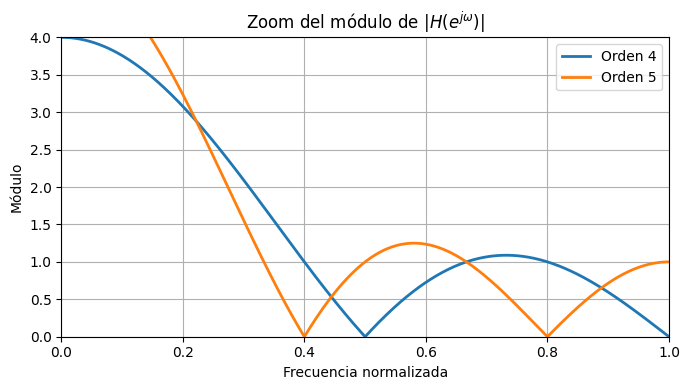

In [16]:
"""
Created on Fri May 30 12:43:20 2025
@author: iremo
"""

import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

tznum5 = [1, 1, 1, 1, 1]  # 1 + z^{-1} + z^{-2} + z^{-3}
tznum4 = [1, 1, 1, 1]
tzden5 = [1, 0, 0, 0, 0]
tzden4 = [1, 0, 0, 0]

w5, h5 = sig.freqz(tznum5, tzden5)
freqN5 = w5 / np.pi

w4, h4 = sig.freqz(tznum4, tzden4)
freqN4 = w4 / np.pi

plt.figure(figsize=(7, 4))
plt.plot(freqN4, np.abs(h4), label='Orden 4', linewidth=2)
plt.plot(freqN5, np.abs(h5), label='Orden 5', linewidth=2)
plt.title('Zoom del módulo de $|H(e^{j\omega})|$')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Módulo')
plt.xlim(0, 1)
plt.ylim(0, 4)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


Se graficaron las repsuestas de módulo de los filtros representados por las ecuaciones a y b, permitiendo observar la diferencia en la atenuación. Como se logra apreciar, la curva anaranjada representa la respuesta de módulo de la función de transferencia del filtro pasa bajos de orden M = 5, este filtro atenúa más rápidaente las frecuencias fuera del paso bajo, por lo que se puede concluir que a medida que el orden es mayor, la atenuación es más abrupta. Por lo que un filtro de más muestras implica mejor selectividad, es decir, mejora el rechazo de frecuencias altas. Sin embargo, esto aumenta el retardo temporal. Asimismo, aumentar el número de muestras prodcue una respuesta que responde más suavementa a cambios de frecuencia, lo cual es deseable para señales ruidosas o con alta varianza.






**c)**

Ecuación en diferencias:

$y(n) = x(n) - x(n - 1)$


Función de transferencia:


$T(z) = \frac{z - 1}{z}$

Sustituimos $ z = e^{j\omega} $ 


Respuesta en frecuencia:


Módulo:

$| T(e^{j\omega})| = 2 | \sin(\frac{\omega}{2} ) |$


Fase:

$\angle T(e^{j\omega}) = -\frac{\omega}{2} + \frac{\pi}{2} \quad$ (por la parte imaginaria positiva)

A partir de su respuesta en mòdulo y fase, podemos anticipar que se trata de un pasa altas de primer orden




### Validación en Python:

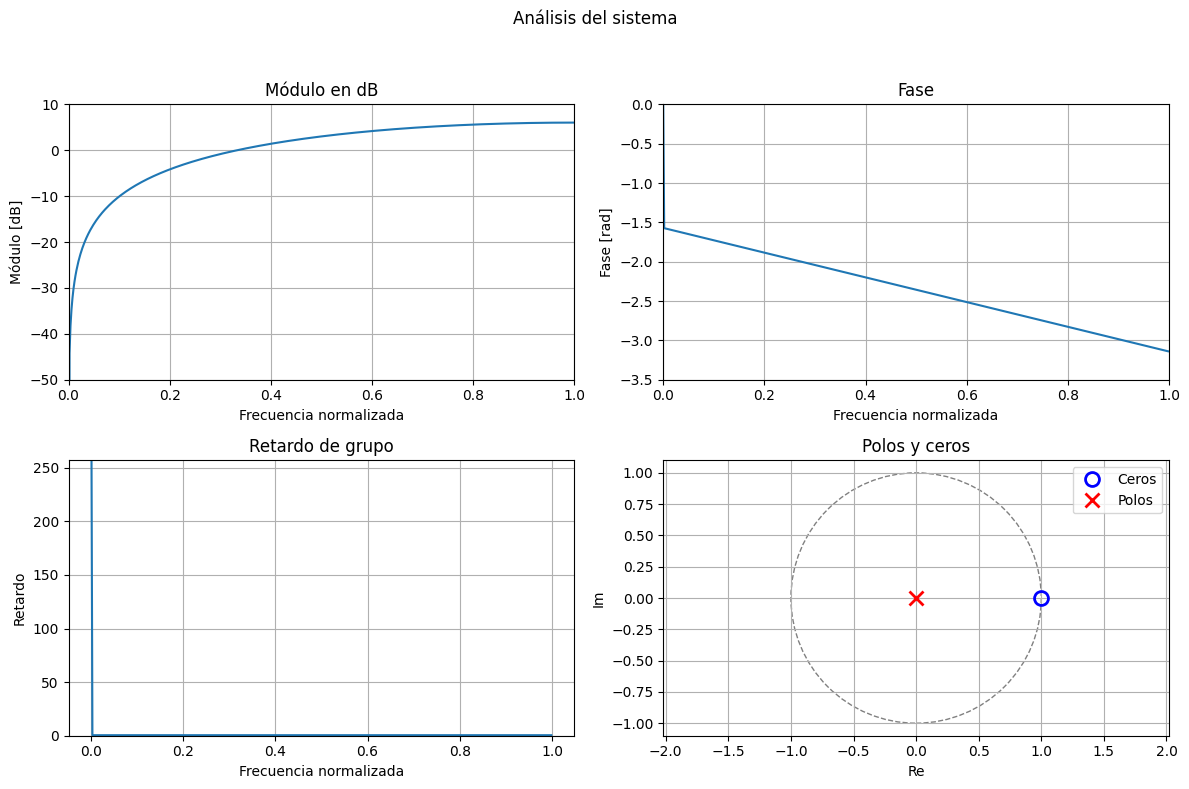

In [43]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 30 12:43:20 2025
@author: iremo
"""

import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

tznum = [-1, 1] 
tzden = [1, 0]

w, h = sig.freqz(tznum, tzden)
freqN = w / np.pi
retardoGrupo = -np.diff(np.unwrap(np.angle(h))) / np.diff(w)

# Polos y ceros
tfz = sig.TransferFunction(tznum, tzden, dt=1)  # Sistema discreto

# Figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Análisis del sistema')

# Módulo
axs[0, 0].plot(freqN, 20 * np.log10(np.abs(h)+1e-10))
axs[0, 0].set_title('Módulo en dB')
axs[0, 0].set_xlabel('Frecuencia normalizada')
axs[0, 0].set_ylabel('Módulo [dB]')
axs[0, 0].grid()
axs[0, 0].set_ylim(-50, 10)
axs[0, 0].set_xlim(0, 1)

# Fase
axs[0, 1].plot(freqN, np.angle(h))
axs[0, 1].set_title('Fase')
axs[0, 1].set_xlabel('Frecuencia normalizada')
axs[0, 1].set_ylabel('Fase [rad]')
axs[0, 1].grid()
axs[0, 1].set_ylim(-3.5, 0)
axs[0, 1].set_xlim(0, 1)

# Retardo de grupo
axs[1, 0].plot(freqN[1:], retardoGrupo)
axs[1, 0].set_title('Retardo de grupo')
axs[1, 0].set_xlabel('Frecuencia normalizada')
axs[1, 0].set_ylabel('Retardo')
axs[1, 0].grid()
maxRetardo = np.ceil(np.max(retardoGrupo))
axs[1, 0].set_ylim(0, maxRetardo)

# Diagrama de polos y ceros
axs[1, 1].plot(np.real(tfz.zeros), np.imag(tfz.zeros), 'o', color='blue',
              markersize=10, fillstyle='none', markeredgewidth=2, label='Ceros')
axs[1, 1].plot(np.real(tfz.poles), np.imag(tfz.poles), 'x', color='red',
              markersize=10, markeredgewidth=2, label='Polos')
circle = plt.Circle((0, 0), 1, color='gray', linestyle='--', fill=False)
axs[1, 1].add_patch(circle)
axs[1, 1].axis('equal')
axs[1, 1].set_title('Polos y ceros')
axs[1, 1].set_xlabel('Re')
axs[1, 1].set_ylabel('Im')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Interpretación:

Gracias a la resolución de la ecuación en diferencias y a la validación de la respuesta en frecuencia usando sig.freqz, se reafirma que la ecuación representa un filtro pasa altas de primer orden. 
La primer figura, que representa la repsuesta de módulo en frecuencia presenta un claro claro filtro pasa altas, que atenúa para w tendiendo a 0 y posee una ganancia unitaria en frecuencias altas. En cuanto a la fase, observamos nuevamente una forma lineal, lo cual es esperable ya que se trata de un FIR simétrico. Asimismo, observamos que el único polo del sistema se encuentra en el origen, lo que indica estabilidad, otra característica que define a los filtros FIR. 
Observación: Si bien se esperaría un retardo de 1/" muestra, se observa un retardo extremadamente alto que contradice con lo esperable. Este resultado puede atribuirse al cero en el origen, que genera una discontinuidad de fase, afectando el cálculo numérico de la derivada.

**d)**

Ecuación en diferencias:

$y(n) = x(n) - x(n - 2)$


Función de transferencia:

$T(z) = \frac{z^2 - 1}{z^2}$

Sustituimos $ z = e^{j\omega} $:


Respuesta en frecuencia:


Módulo:

$| T(e^{j\omega})| = 2| \sin(\omega) |$

Fase:

$\angle T(e^{j\omega}) = -\omega + \frac{\pi}{2}$


### Validación en Python:

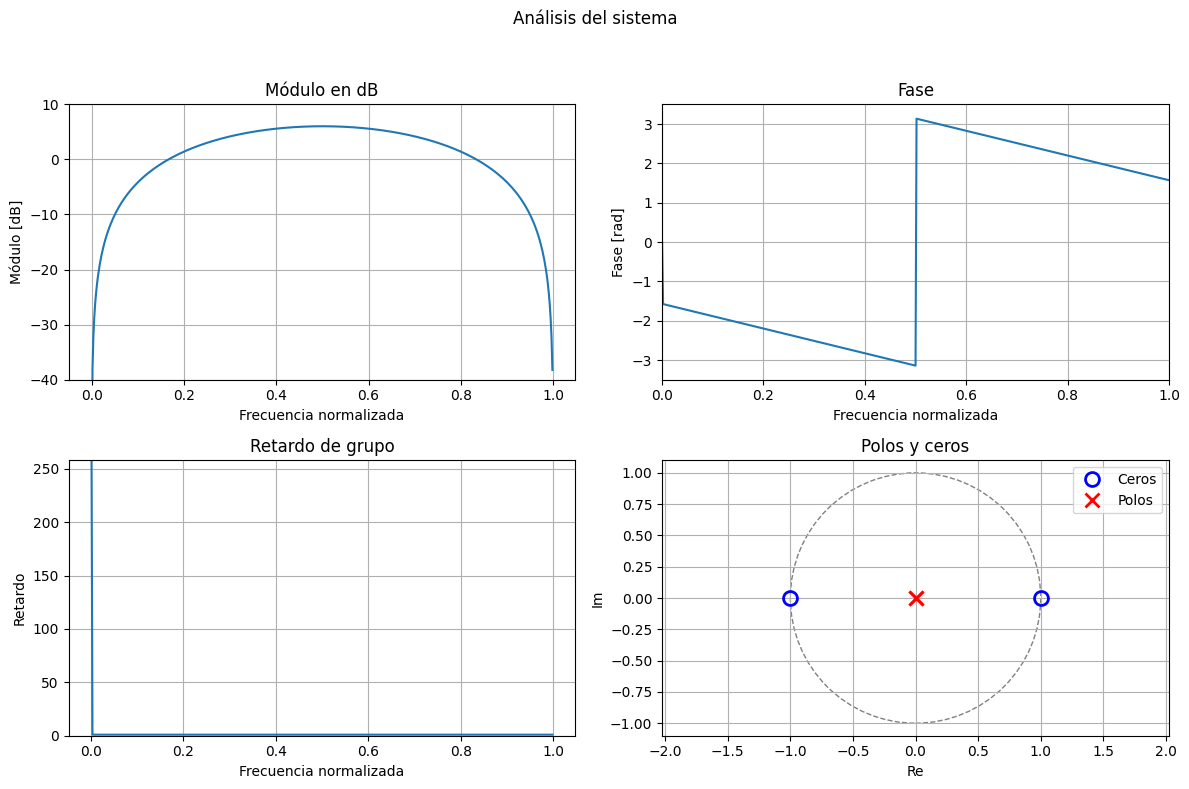

In [37]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 30 12:43:20 2025
@author: iremo
"""

import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

tznum = [-1, 0, 1] 
tzden = [1, 0, 0]

w, h = sig.freqz(tznum, tzden)
freqN = w / np.pi
retardoGrupo = -np.diff(np.unwrap(np.angle(h))) / np.diff(w)

# Polos y ceros
tfz = sig.TransferFunction(tznum, tzden, dt=1)  # Sistema discreto

# Figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Análisis del sistema')

# Módulo
axs[0, 0].plot(freqN, 20 * np.log10(np.abs(h)+1e-10))
axs[0, 0].set_title('Módulo en dB')
axs[0, 0].set_xlabel('Frecuencia normalizada')
axs[0, 0].set_ylabel('Módulo [dB]')
axs[0, 0].set_ylim(-40, 10)
axs[0, 0].grid()

# Fase
axs[0, 1].plot(freqN, np.angle(h))
axs[0, 1].set_title('Fase')
axs[0, 1].set_xlabel('Frecuencia normalizada')
axs[0, 1].set_ylabel('Fase [rad]')
axs[0, 1].set_ylim(-3.5, 3.5)
axs[0, 1].set_xlim(0, 1)
axs[0, 1].grid()

# Retardo de grupo
axs[1, 0].plot(freqN[1:], retardoGrupo)
axs[1, 0].set_title('Retardo de grupo')
axs[1, 0].set_xlabel('Frecuencia normalizada')
axs[1, 0].set_ylabel('Retardo')
axs[1, 0].grid()
maxRetardo = np.ceil(np.max(retardoGrupo))
axs[1, 0].set_ylim(0, maxRetardo)

# Diagrama de polos y ceros
axs[1, 1].plot(np.real(tfz.zeros), np.imag(tfz.zeros), 'o', color='blue',
              markersize=10, fillstyle='none', markeredgewidth=2, label='Ceros')
axs[1, 1].plot(np.real(tfz.poles), np.imag(tfz.poles), 'x', color='red',
              markersize=10, markeredgewidth=2, label='Polos')
circle = plt.Circle((0, 0), 1, color='gray', linestyle='--', fill=False)
axs[1, 1].add_patch(circle)
axs[1, 1].axis('equal')
axs[1, 1].set_title('Polos y ceros')
axs[1, 1].set_xlabel('Re')
axs[1, 1].set_ylabel('Im')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Interpretación:

A paritr de las figuras obtenidas, se concluye que la ecuación efectivamente representa un filtro pasabandas de elemental dado que tanto en nyquist como en DC, hay ceros. Al igual que en el caso anterior, se observa un retardo extremadamente alto (cuando debería ser de 1 muestra), posiblemente adjudicado a la presencia del cero que produce discontinuidad en la fase y ocasiona problemas en el cálculo numérico de la derivada.

## Conclusiones ## 

El trabajo realizado permitió ver que los filtros FIR de fase lineal se diferencian a gran medida de los analógicos vistos hasta el momento, debido a que presentan una fase **exactamente** lineal, por lo que se destacan por preservar la forma de onda, y no introducen distorsión de fase. Todas lascomponentes frecuenciales se retrasan la misma cantidad de muestras, esto es lo que evita la distorsión. 
Asimismo, los filtros analizados son siempre estables, esto se atribuye a que sus polos se encuentran clavados en el orgien del plano Z, haciendolos confiables y seguros. 
Su diseño es además altamente flexible, lo que permite construir filtros de diversos tipos por medio de una única estructura simple y reutilizable. Esto los hace fácilmente implementables en hardware digital, ya que no requieren retroalimentación,lo que simplifica el uso de aritmética de punto fijo.
Las características asociadas a la fase lineal hace de estos filtros una fundamental herramienta en aplicaciones com oprocesamiento de audio, señales biomédicas o comunicaciones.
No obstante, este tipo de filtros traen ciertas desventajas, siendo estas:
1. Retardo: Los filtros de fase lineal poseen n retardo de grupo constante de N-1 / 2 muestras, con N el número de coeficientes. Observese que para mejorar la selectividad, N debe ser alto, por lo que el retardo será también alto, lo cual no es ideal si se quiere una respesta inmediata.
2. Costo computacional: Un N alto implica más multiplicaciones y sumas por muestra esto aumenta el costo computaciones, y se agrava en sistemas donde hay limitaciones de energía o velocidad.

A pesar de las limitaciones mencionadas, las ventajas de estabilidad, fase lineal, así como también su facilidad implementación hacen de los filtro FIR ua herramienta muy utilizada en diseño de sistemas digitales.